In [1]:
using Statistics
using Flux, Flux.Optimise
using MLDatasets: CIFAR10
using Images.ImageCore
using Flux: onehotbatch, onecold
using Base.Iterators: partition

In [2]:
train_x, train_y = CIFAR10.traindata(Float32)
labels = onehotbatch(train_y, 0:9)

10×50000 Flux.OneHotMatrix{Array{Flux.OneHotVector,1}}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  1  0  1  0  0  0  0  0
 0  0  0  0  1  1  0  0  0  0  0  0  0     0  1  0  0  0  1  0  0  0  0  1  1
 0  0  0  0  0  0  1  0  0  0  0  0  0     0  0  0  1  0  0  0  1  0  0  0  0
 0  0  0  0  0  0  0  0  0  1  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0  1  0  0     0  0  1  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  1  0  0  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  1  0  0  0
 0  0  0  0  0  0  0  1  0  0  0  1  1     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  1  0  0

In [3]:
size(train_x)

(32, 32, 3, 50000)

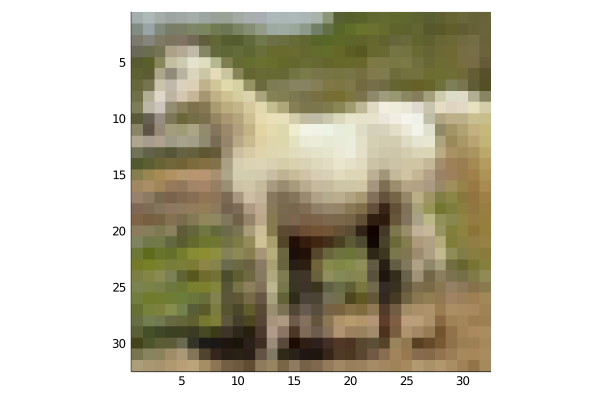

In [4]:
using Plots

image(x) = colorview(RGB, permutedims(x, (3, 2, 1)))

plot(image(train_x[:, :, :, rand(1:end)]))

In [5]:
train = ([(train_x[:,:,:,i], labels[:,i]) for i in partition(1:49000, 1000)])
valset = 49001:50000
valX = train_x[:,:,:,valset]
valY = labels[:, valset]

10×1000 Flux.OneHotMatrix{Array{Flux.OneHotVector,1}}:
 0  0  0  0  1  0  1  0  0  0  0  0  0  …  0  0  0  0  1  0  1  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  1  0  0  0  1  0  0  0  0  1  1
 0  0  0  0  0  0  0  0  1  0  0  0  0     0  0  0  1  0  0  0  1  0  0  0  0
 0  0  0  0  0  0  0  0  0  1  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     0  0  1  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0  0  0  0  …  1  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  1  0  0  0
 0  0  0  0  0  0  0  0  0  0  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  1  0  0  0  1  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  0  1  0  0  0  0  0  0  0  0  1     0  0  0  0  0  0  0  0  0  1  0  0

In [6]:
m = Chain(
  Conv((5,5), 3=>16, relu),
  MaxPool((2,2)),
  Conv((5,5), 16=>8, relu),
  MaxPool((2,2)),
  x -> reshape(x, :, size(x, 4)),
  Dense(200, 120),
  Dense(120, 84),
  Dense(84, 10),
  softmax)

Chain(Conv((5, 5), 3=>16, relu), MaxPool((2, 2), pad = (0, 0, 0, 0), stride = (2, 2)), Conv((5, 5), 16=>8, relu), MaxPool((2, 2), pad = (0, 0, 0, 0), stride = (2, 2)), #3, Dense(200, 120), Dense(120, 84), Dense(84, 10), softmax)

In [7]:
using Flux: crossentropy, Momentum

loss(x, y) = sum(crossentropy(m(x), y))
opt = Momentum(0.01)

Momentum(0.01, 0.9, IdDict{Any,Any}())

In [8]:
accuracy(x, y) = mean(onecold(m(x), 0:9) .== onecold(y, 0:9))

accuracy (generic function with 1 method)

In [9]:
epochs = 20

for epoch = 1:epochs
    for d in train
        gs = gradient(params(m)) do
            l = loss(d...)
        end
        update!(opt, params(m), gs)
    end
    @show accuracy(valX, valY)
end

accuracy(valX, valY) = 0.232
accuracy(valX, valY) = 0.307
accuracy(valX, valY) = 0.391
accuracy(valX, valY) = 0.414
accuracy(valX, valY) = 0.424
accuracy(valX, valY) = 0.447
accuracy(valX, valY) = 0.456
accuracy(valX, valY) = 0.483
accuracy(valX, valY) = 0.5
accuracy(valX, valY) = 0.496
accuracy(valX, valY) = 0.497
accuracy(valX, valY) = 0.515
accuracy(valX, valY) = 0.518
accuracy(valX, valY) = 0.535
accuracy(valX, valY) = 0.543
accuracy(valX, valY) = 0.546
accuracy(valX, valY) = 0.559
accuracy(valX, valY) = 0.563
accuracy(valX, valY) = 0.568
accuracy(valX, valY) = 0.573
